In [19]:
## Import all the modules we need most 
from tkinter import filedialog # interface for opening a file explorer
from tkinter import * # * imports all files in tkinter
import numpy as np
import skued
import glob
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
## Define all functions needed
def rebin(arr, binsize):
    shape = (arr.shape[0]//binsize, binsize,
             arr.shape[1]//binsize, binsize)
    return arr.reshape(shape).mean(-1).mean(1)

In [3]:
## Data Directory GUI 
'''Getting data directory so data can easily be imported.
Direct explorer to folder with files you want. '''

root = Tk(); # Tk() is a function in tkinter that opens a window
root.directory = filedialog.askdirectory(); # opens explorer window so you can find the folder of choice
root.withdraw(); # closes the tkinter window since it's unnecessary

In [4]:
## Load Files names 
''' Load and list filenames Change the extensions to whatever you want to find '''
path = root.directory + '/*.dm4' # creates path to data set folder directory. Change .csv to file type as needed
a=0 # counter for looping through list starting at 0
file_list=glob.glob(path)
file_list

['C:/Users/BooSchliep/Downloads/25 kHz 5mJcm2 10mW 355-20180930T122326Z-002/25 kHz 5mJcm2 10mW 355\\Run_2_D 730 mm_25kHz_5mJcm2_100_3950ns_100_100.dm4',
 'C:/Users/BooSchliep/Downloads/25 kHz 5mJcm2 10mW 355-20180930T122326Z-002/25 kHz 5mJcm2 10mW 355\\Run_2_D 730 mm_25kHz_5mJcm2_101_4000ns_101_101.dm4',
 'C:/Users/BooSchliep/Downloads/25 kHz 5mJcm2 10mW 355-20180930T122326Z-002/25 kHz 5mJcm2 10mW 355\\Run_2_D 730 mm_25kHz_5mJcm2_104_4150ns_104_104.dm4',
 'C:/Users/BooSchliep/Downloads/25 kHz 5mJcm2 10mW 355-20180930T122326Z-002/25 kHz 5mJcm2 10mW 355\\Run_2_D 730 mm_25kHz_5mJcm2_107_4300ns_107_107.dm4',
 'C:/Users/BooSchliep/Downloads/25 kHz 5mJcm2 10mW 355-20180930T122326Z-002/25 kHz 5mJcm2 10mW 355\\Run_2_D 730 mm_25kHz_5mJcm2_110_4450ns_110_110.dm4',
 'C:/Users/BooSchliep/Downloads/25 kHz 5mJcm2 10mW 355-20180930T122326Z-002/25 kHz 5mJcm2 10mW 355\\Run_2_D 730 mm_25kHz_5mJcm2_115_4700ns_115_115.dm4',
 'C:/Users/BooSchliep/Downloads/25 kHz 5mJcm2 10mW 355-20180930T122326Z-002/25 kHz

In [5]:
## Load Data  into numpy matrix
''' Open data and set up for analysis'''

num_files = np.size(file_list) # number of files in the directory with the correct file type
file_shape = skued.diffread(file_list[0]).shape # data file size
matrix_shape = np.append(file_shape, num_files) # size of matrix to hold all data
data_array = np.empty(matrix_shape) # builds empty matrix of size matrix_shape
a=0
for fname in file_list: #iterates through files along order of glob.glob(path)

        datapd = skued.diffread(fname) # converts from dataframe to numpy array
#         print(a)
        data_array[:,:,a] = datapd # inserts each file as new layer of matrix along z axis (axis=2)
        a+=1 # increase counter to progress through list


In [25]:
## Remove noise from all frames in matrix
'''
Bins image and iterates through all frames of data matrix and applies a baseline determination to remove hotspots.
Takes too long to run locally. Can definitely be enhanced using npstream
'''

binvalue=4
img_size=(int(data_array.shape[0]//binvalue),int(data_array.shape[1]//binvalue))
mat_size=np.append(img_size,data_array.shape[2])
data_array_rn=np.zeros(mat_size) 
data_array_orig=np.zeros(mat_size)
for n in tqdm(range(data_array.shape[2])): # iterate over all images tqdm is a bit broken but times it 
    tmp=rebin(data_array[:,:,n],binvalue);
    data_array_orig[:,:,n]=tmp;
    data_array_rn[:,:,n]=skued.baseline_dwt(tmp, max_iter=5, level=1);
    

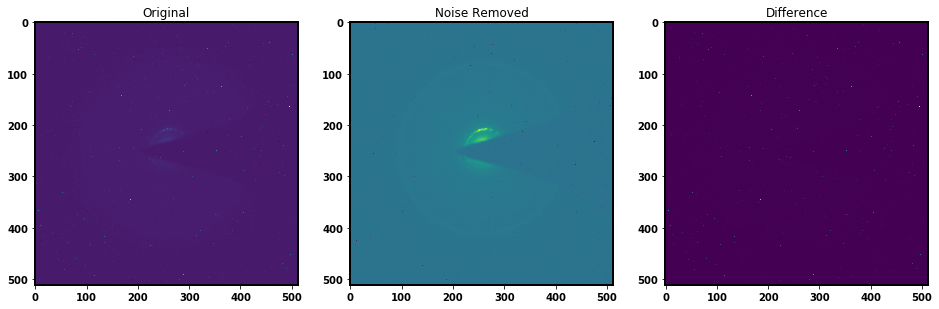

In [22]:
## Plot comparison of mean images

mean_orig=np.mean(data_array_orig,axis=2)
mean_rn=np.mean(data_array_rn,axis=2)
Diff=mean_orig-mean_rn
plt.rc('font', weight='bold')
plt.rcParams['axes.linewidth']=2
plt.rcParams['figure.figsize'] = (16,9)

fig = plt.figure()
# fig.suptitle(Data_Name, fontsize=36, fontweight='bold')

ax1 = fig.add_subplot(133)
plt.title('Difference')

ax1.imshow(Diff)

ax2 = fig.add_subplot(131)
plt.title('Original')

ax2.imshow(mean_orig)

ax3 = fig.add_subplot(132)
plt.title('Noise Removed')

ax3.imshow(mean_rn)

In [ ]:
## For printing our the figure. I can spruce it up more too if you want
'''
Choose file destination and set filename and extention and dpi
'''
root1 = Tk(); # Tk() is a function in tkinter that opens a window
root1.directory = filedialog.askdirectory(); # opens explorer window so you can find the folder of choice
root1.withdraw(); # closes the tkinter window since it's unnecessary
file_name1='FileName'
ext1='.png'
file_loc1=root1.directory+'/'+file_name1+ext1
file_loc1
fig1.savefig(file_loc1,dpi=600, bbox_inches='tight')